# **Importing** **Libraries**

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# **load Dataset**

In [129]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Data Inspection**

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [131]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [132]:
df.shape

(1338, 7)

In [133]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **Data Preprocessing**

In [134]:
X = df.drop('charges', axis=1)
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [135]:
# encoding categorical column {'sex','smoker','region'}

# Manual Encoding (Binary Mapping Method)
#X['sex'] = X['sex'].map({'male': 1, 'female': 0})
#X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})

# One-hot encoding for region
X = pd.get_dummies(X, columns=['region','sex','smoker'], drop_first=True)

In [136]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42 )

In [137]:
# Normalization the Numircal column
scaler = StandardScaler()
#num_cols = ['age', 'bmi', 'children']
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
X_test

array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.5723141 ,
        -1.0246016 , -0.50874702],
       [-0.23863782, -0.08946143, -0.91119211, ..., -0.5723141 ,
        -1.0246016 , -0.50874702],
       [ 1.75178229, -0.60845296, -0.91119211, ..., -0.5723141 ,
        -1.0246016 ,  1.96561348],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ..., -0.5723141 ,
         0.97598911, -0.50874702],
       [ 1.04091797,  2.78941026, -0.91119211, ..., -0.5723141 ,
        -1.0246016 ,  1.96561348],
       [ 0.82765867,  0.60252728, -0.08842793, ...,  1.74729228,
        -1.0246016 , -0.50874702]], shape=(268, 8))

# **Create KNN Model**

In [139]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


# **Predicting Step**

In [140]:
y_pred = knn.predict(X_test)

# **Model Evaluation**

In [141]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"{'Metric':30} | Value")
print("-" * 45)
print(f"{'Mean Squared Error':30} | {mse}")
print(f"{'Mean Absolute Error':30} | {mae}")
print(f"{'R2 Score':30} | {r2}")
print(f"{'Root Mean Squared Error':30} | {rmse}")

Metric                         | Value
---------------------------------------------
Mean Squared Error             | 30459865.823198732
Mean Absolute Error            | 3494.746057742537
R2 Score                       | 0.8037995832203448
Root Mean Squared Error        | 5519.045734834848


# **Model Diagnostics**


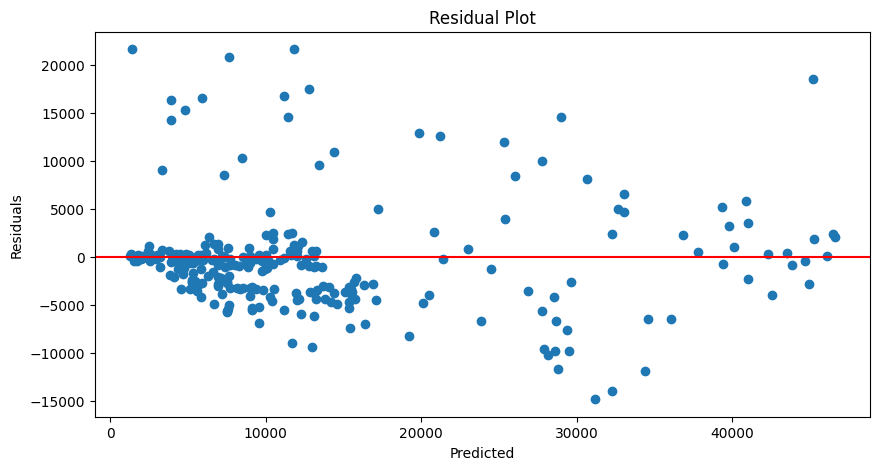

In [142]:
#Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot", color ='black')
plt.show()

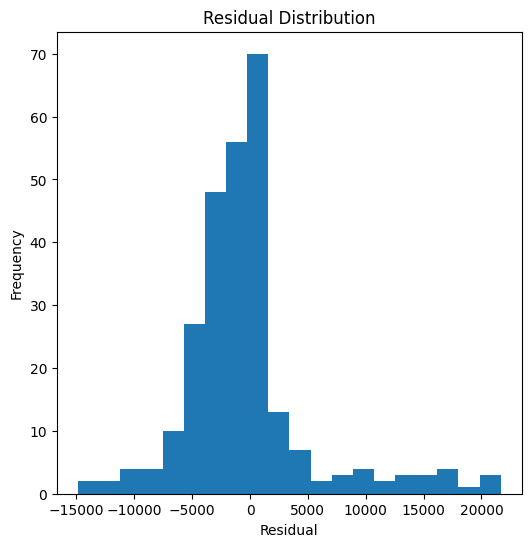

In [143]:
#Residual Distribution
plt.figure(figsize=(6,6))
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

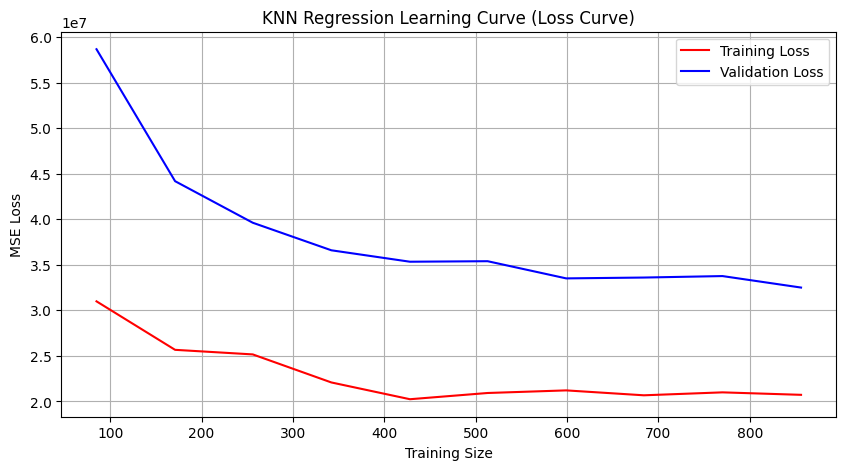

In [144]:
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_loss = -train_scores.mean(axis=1)
test_loss  = -test_scores.mean(axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_loss, label='Training Loss', color='red')
plt.plot(train_sizes, test_loss, label='Validation Loss', color='blue')
plt.xlabel("Training Size")
plt.ylabel("MSE Loss")
plt.title("KNN Regression Learning Curve (Loss Curve)")
plt.legend()
plt.grid()
plt.show()

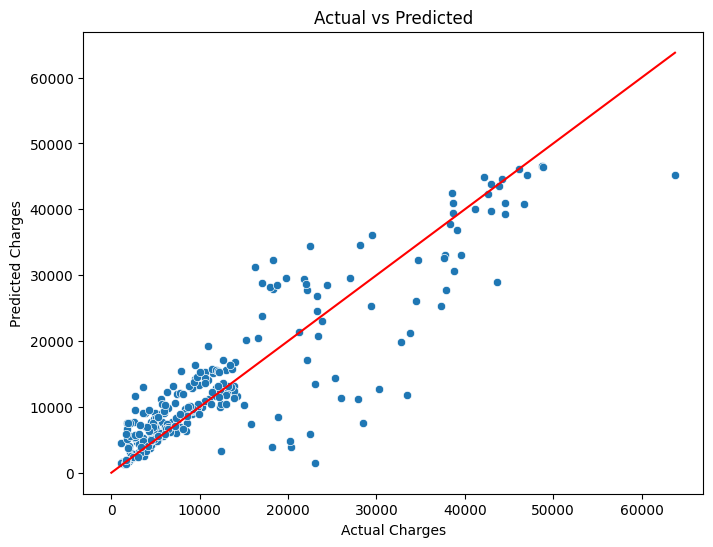

In [145]:
#  ACTUAL vs PREDICTED
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.show()